## Notebook 5: Análise de Distribuição de Scores

### Carregamento dos Datasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

INPUT_DATA_PATH = './datas/'
OUTPUT_PATH = './outputs/'

In [2]:
df_animes = pd.read_csv(os.path.join(INPUT_DATA_PATH, 'animes.csv'))

print(f"Animes: {df_animes.shape}")
df_animes[['title', 'score', 'type']].head(10)

Animes: (20237, 13)


,title,score,type
0,Howl's Moving Castle,8.41,MOVIE
1,Death Note,8.63,TV
2,Problem Children Are Coming from Another World...,7.42,TV
3,BTOOOM!,7.34,TV
4,Sword Art Online,7.50,TV
5,Spirited Away,8.64,MOVIE
6,Princess Mononoke,8.59,MOVIE
7,Magi: The Labyrinth of Magic,8.00,TV
8,Accel World,7.31,TV
9,Eden of The East,7.81,TV


### Transformação: Limpeza e Preparação

In [3]:
df_clean = df_animes[df_animes['score'].notna()].copy()

# Filtrar scores válidos (1-10)
df_clean = df_clean[(df_clean['score'] >= 1) & (df_clean['score'] <= 10)]

print(f"Dados após limpeza: {df_clean.shape}")
print(f"\nEstatísticas dos scores:")
print(df_clean['score'].describe())

Dados após limpeza: (19644, 13)

Estatísticas dos scores:
count    19644.000000
mean         6.315589
std          1.013830
min          1.730000
25%          5.610000
50%          6.340000
75%          7.040000
max         10.000000
Name: score, dtype: float64


### Análise 5: Distribuição de Frequência dos Scores (Histograma)

In [4]:
# Estatísticas descritivas
media = df_clean['score'].mean()
mediana = df_clean['score'].median()
desvio = df_clean['score'].std()

print(f"Média: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Desvio Padrão: {desvio:.2f}")
print(f"\nTotal de animes com score: {len(df_clean)}")

Média: 6.32
Mediana: 6.34
Desvio Padrão: 1.01

Total de animes com score: 19644


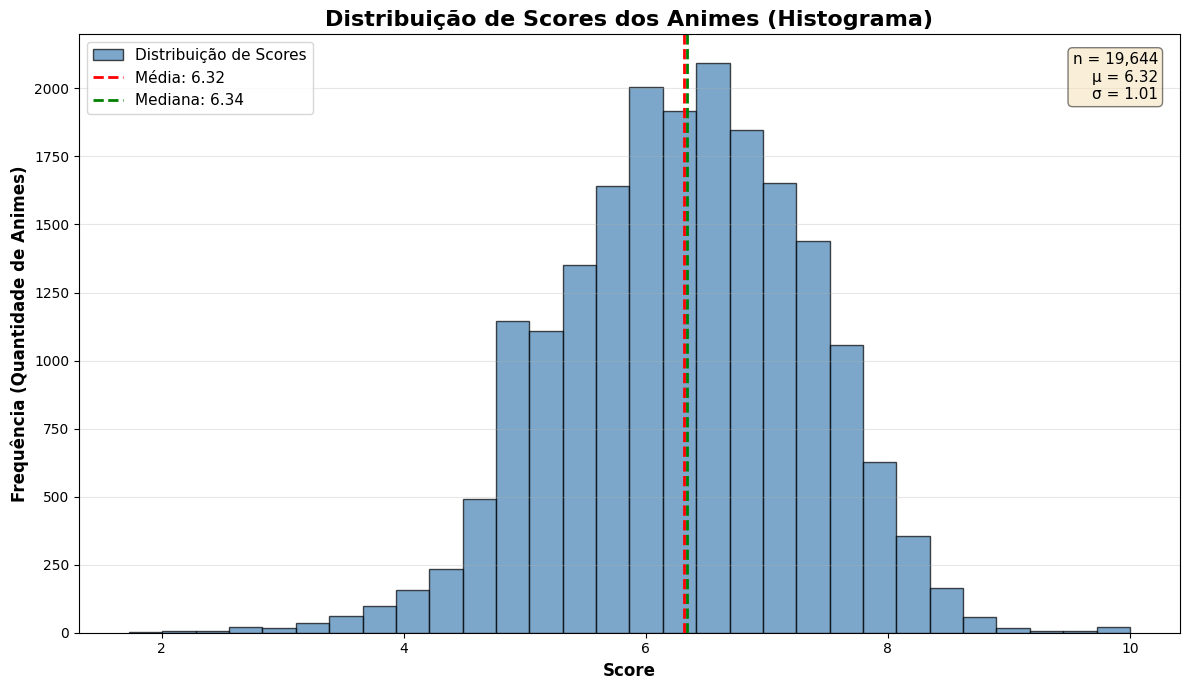

In [5]:
# Visualização com histograma
plt.figure(figsize=(12, 7))

n, bins, patches = plt.hist(df_clean['score'], bins=30, 
                             color='steelblue', edgecolor='black', 
                             alpha=0.7, label='Distribuição de Scores')

# Linha de média
plt.axvline(media, color='red', linestyle='--', linewidth=2, 
            label=f'Média: {media:.2f}')

# Linha de mediana
plt.axvline(mediana, color='green', linestyle='--', linewidth=2, 
            label=f'Mediana: {mediana:.2f}')

# Layout
plt.title('Distribuição de Scores dos Animes (Histograma)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Score', fontsize=12, fontweight='bold')
plt.ylabel('Frequência (Quantidade de Animes)', fontsize=12, fontweight='bold')
plt.legend(fontsize=11, loc='upper left')
plt.grid(axis='y', alpha=0.3)

# Adicionar texto com estatísticas
stats_text = f'n = {len(df_clean):,}\nμ = {media:.2f}\nσ = {desvio:.2f}'
plt.text(0.98, 0.97, stats_text, transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PATH, 'nb5_histograma_scores.png'), dpi=300, bbox_inches='tight')
plt.show()

#### Explicação do Gráfico

Este histograma é tipo um retrato da "distribuição de qualidade" no mundo dos animes! Cada barra representa quantos animes existem em cada faixa de score, e o padrão que aparece é bem revelador.

**A curva tem formato de sino** (o famoso formato "normal" da estatística), o que já diz muita coisa: a maioria dos animes está na zona do "ok pra bom", ali entre 6 e 7.5. Não é medíocre demais, mas também não é obra-prima. É aquele anime gostosinho de assistir num domingo à tarde!

**A média e mediana ficam bem próximas**, confirmando que a distribuição é bem equilibrada. Isso significa que não tem viés forte nem pra cima nem pra baixo.

Agora vem o mais interessante: **olha como os extremos são raros!** 

- **Animes muito ruins** (score abaixo de 4) são poucos. Talvez porque produções muito ruins simplesmente não ganham tração - ninguém assiste, ninguém avalia, e elas meio que somem do radar.

- **Obras-primas** (score acima de 9) também são raras. Faz sentido, né? Se fosse fácil fazer um anime excepcional, não seria excepcional! Esses são aqueles títulos que marcam gerações.

**A "barriga" do gráfico** ali no meio mostra a realidade da indústria: tem MUITA produção na faixa "legal de assistir". São animes competentes, que cumprem o que prometem, mas não necessariamente mudam sua vida.

O desvio padrão moderado nos diz que existe variação, mas ela é controlada. Não é uma bagunça total - existem padrões de qualidade na indústria.

No fim das contas, esse histograma nos mostra que **a indústria de anime é consistente**. Ela entrega principalmente conteúdo na faixa 6-7.5, com algumas joias raras no topo e alguns tropeços no fundo. É uma indústria madura que conhece bem seu ofício!